In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [217]:
svmdf = pd.read_csv('../processed-data/processed-data.csv')

Now let us see what is the dataset which we will be working with for the classification

In [218]:
svmdf.head()

,Unnamed: 0,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pca_component_1,pca_component_2
0,0,23,12,19114.12,3,3,4,7.0,1,1.0,26.822620,22.0833,0,49.574949,4.387204,3,312.494089,2.0,-616.432092,-13.474437
1,1,23,12,19114.12,3,3,4,14.0,1,2.0,31.944960,0.0000,0,49.574949,4.773057,4,284.629162,2.0,-616.461504,-17.472881
2,3,23,12,19114.12,3,3,4,4.0,1,2.0,31.377862,22.3333,0,49.574949,5.295604,6,223.451310,2.0,-616.410033,-10.475604
3,4,23,12,19114.12,3,3,4,14.0,1,2.0,24.797347,22.4167,0,49.574949,3.723768,2,341.489231,2.0,-616.400608,-8.530153
4,5,23,12,19114.12,3,3,4,4.0,1,2.0,27.262259,22.5000,0,49.574949,4.134049,0,340.479212,2.0,-616.432092,-13.474437


In [219]:
svmdf.shape

(97230, 20)

In [220]:
svmdf.dtypes

Unnamed: 0                    int64
Age                           int64
Occupation                    int64
Annual_Income               float64
Num_Bank_Accounts             int64
Interest_Rate                 int64
Num_of_Loan                   int64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries          int64
Credit_Mix                  float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                float64
pca_component_1             float64
pca_component_2             float64
dtype: object

In [221]:
svmdf.isna().sum()

Unnamed: 0                  0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Interest_Rate               0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Mix                  0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
pca_component_1             0
pca_component_2             0
dtype: int64

In [222]:
svmdf.drop(columns='Unnamed: 0',axis = 1,inplace=True)
svmdf.dropna(inplace=True)
svmdf.shape

(97230, 19)

We are dealing with a dataset which has over 90,000 records and 19 columns so we shall first sample the data to reduce the number of records to work with to increase the accuracy of the svm model.

To handle data imbalance we will take undersampled records from each of the three target variable categories and find out the optimum number for the model analysis.


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score



In [224]:
def confusion_matrix_display(actual,predicted,n):
    conf_matrix =confusion_matrix(actual, predicted)
    print(f"confusion matrix heatmap for {n} records:")
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Poor', 'Predicted Standard','Predicted Good'],
            yticklabels=['True Poor', 'True Standard','True Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

confusion matrix heatmap for 3000 records:


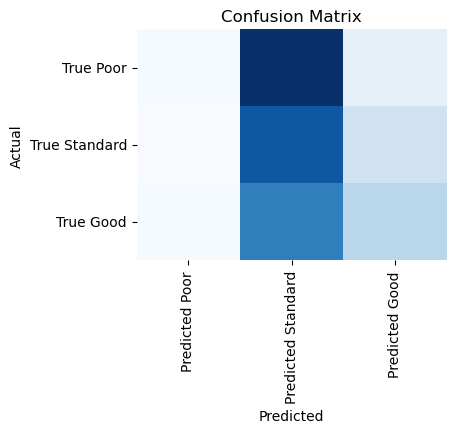

confusion matrix heatmap for 6000 records:


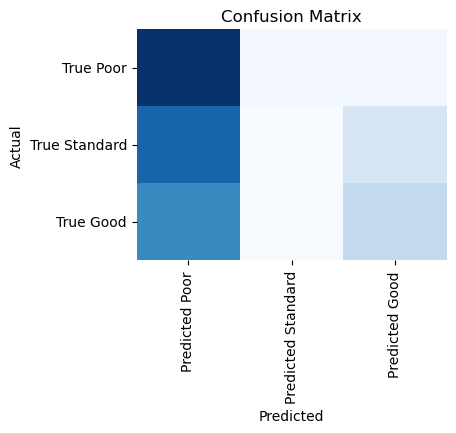

confusion matrix heatmap for 9000 records:


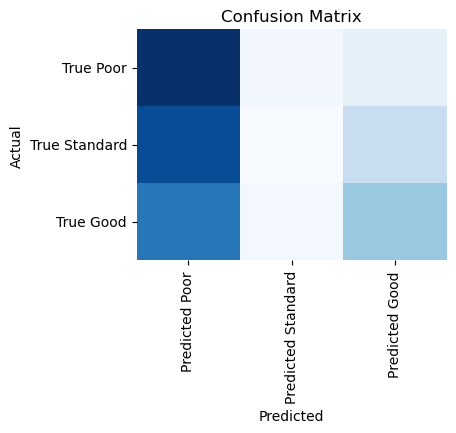

confusion matrix heatmap for 12000 records:


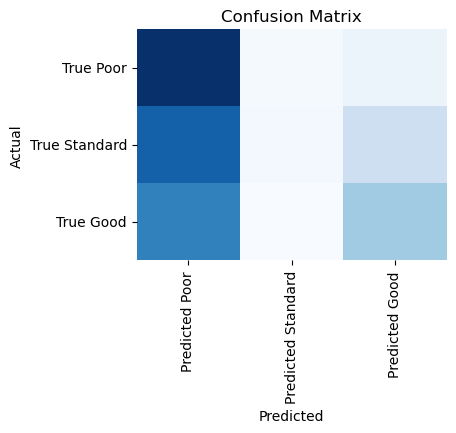

In [225]:
data = []
init_accuracy = 0
hmm = [[]]
def svm_accuracy(n=[1000,2000,3000,4000,5000],svmdf = svmdf,hmm = hmm):
    for i in n:
        df0 = svmdf[svmdf['Credit_Score']==0]
        df1 = svmdf[svmdf['Credit_Score']==1]
        df2 = svmdf[svmdf['Credit_Score']==2]
        

        #resampling the data to make SVM more efficient
        df0 = df0.sample(replace = False,n =i,random_state=42)
        df1 = df1.sample(replace = False,n = i,random_state=42)
        df2 = df2.sample(replace = False,n = i,random_state=42)
        final_df = pd.concat([df0,df1,df2])

        X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
        y = final_df['Credit_Score']


        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


        clf_svm = SVC(random_state=42)
        clf_svm.fit(X_train,y_train)

        y_pred = clf_svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average = 'weighted')
        f1 = f1_score(y_test,y_pred,average = 'weighted')
        recall = recall_score(y_test,y_pred,average = 'weighted')

        confusion_matrix_display(y_test,y_pred,i*3)



        indexx = i*3
        l1 = [indexx,accuracy,precision,f1,recall]
        data.append(l1)

    
svm_accuracy()



In [226]:
columns = ['Iterations','Accuracy','Precision', 'Recall', 'F1-score']
scores_df = pd.DataFrame(columns=columns,data=data)
scores_df

,Iterations,Accuracy,Precision,Recall,F1-score
0,3000,0.365333,0.446612,0.280100,0.365333
1,6000,0.410667,0.390813,0.342886,0.410667
2,9000,0.404000,0.367915,0.325035,0.404000
3,12000,0.423000,0.430962,0.356250,0.423000


- We have experimented with various test sizes over how the model performs over each one of them. We find that the model gives best performance with 12000 records so we shall now see how it performs after tuning its hyperparameters.

### HYPERPARAMETER TUNING

In [227]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold,GridSearchCV


In [228]:
df0 = svmdf[svmdf['Credit_Score']==0]
df1 = svmdf[svmdf['Credit_Score']==1]
df2 = svmdf[svmdf['Credit_Score']==2]
        

        
df0 = df0.sample(replace = False,n =1000,random_state=42)
df1 = df1.sample(replace = False,n = 1000,random_state=42)
df2 = df2.sample(replace = False,n = 1000,random_state=42)
final_df = pd.concat([df0,df1,df2])

X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
y = final_df['Credit_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [229]:
SVC_model = SVC(random_state=42)

params = {}
params['shrinking'] = [True]
params['C'] = [1,0.5,5,0.05]
params['kernel'] = ['rbf','sigmoid']
cv = KFold(n_splits=5,shuffle=True,random_state=42)
gridsvm = GridSearchCV(SVC_model,param_grid=params,scoring='accuracy',n_jobs = -1,cv = cv)

gridsvm.fit(X_train,y_train)
gridsvm.best_params_


{'C': 5, 'kernel': 'rbf', 'shrinking': True}

In [230]:
y_pred = gridsvm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.42933333333333334


-- We have finished testing with the various hyperparamters of the svm model and we see that the kernel giving us the best performance is the rbf kernel hence indicating the data has a complex and non-linear pattern like clusters.

-- We were able to improve the model accuracy by 1% by finding the right hyperparameters and we have plateaued at about 43% accuracy with our svm model.